# Wave Field Visualization

This notebook demonstrates how to visualize multiple iterations of a wave field from a Devito simulation.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from plot_wave_iterations import plot_wave_iterations

## Run your simulation

First, run your simulation to generate the wave field `u_`. This should be similar to what you've already done in your `test_circle.ipynb` notebook.

Operator `initdamp` ran in 0.01 s


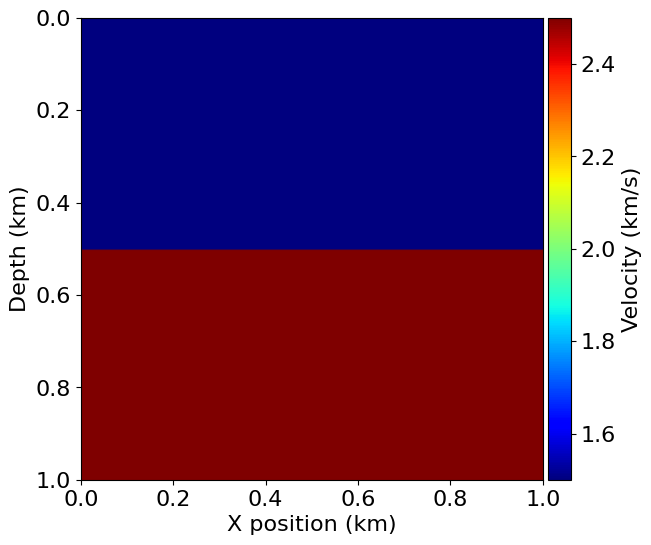

In [2]:
# Import necessary modules from Devito
from examples.seismic import demo_model, plot_velocity, plot_perturbation
from examples.seismic import AcquisitionGeometry
from examples.seismic.acoustic import AcousticWaveSolver
from examples.seismic import Model
import numpy as np
# Define model
shape = (201, 201)  # Number of grid points (nx, nz)
spacing = (5., 5.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # Need origin to define relative source and receiver locations


# Define a velocity profile. The velocity is in km/s
v = np.empty(shape, dtype=np.float32)
v[:, :101] = 1.5
v[:, 101:] = 2.5

# With the velocity and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 10 grid points
model = Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbl=20, bcs="damp")
plot_velocity(model)



In [3]:
# Define source and receivers
t0 = 0.
tn = 1000. 
f0 = 0.010  # 10Hz

src_coordinates = np.empty((1, 2))
src_coordinates[0, :] = np.array(model.domain_size) * .5
src_coordinates[0, 1] = 20  # Position is 20m along y-axis (horizontal)
 
nreceivers = 101  # Number of receiver locations per shot 
rec_coordinates = np.empty((nreceivers, 2))
rec_coordinates[:, 0] = np.linspace(0, model.domain_size[0], num=nreceivers)
rec_coordinates[:, 1] = 0.


# Geometry
geometry = AcquisitionGeometry(model, rec_coordinates, src_coordinates, t0, tn, f0=f0, src_type='Ricker')

In [4]:
# Run the forward simulation
solver = AcousticWaveSolver(model, geometry, space_order=4)
true_d, u_, _ = solver.forward(vp=model.vp, save=True)

# Print the shape of u_ to understand its dimensions
print(f"u_ shape: {u_.shape}")

Operator `Forward` ran in 0.06 s


u_ shape: (818, 241, 241)


## Visualize specific iterations of the wave field

Now that we have the wave field `u_`, we can visualize specific iterations.

Wave field shape: (818, 241, 241)


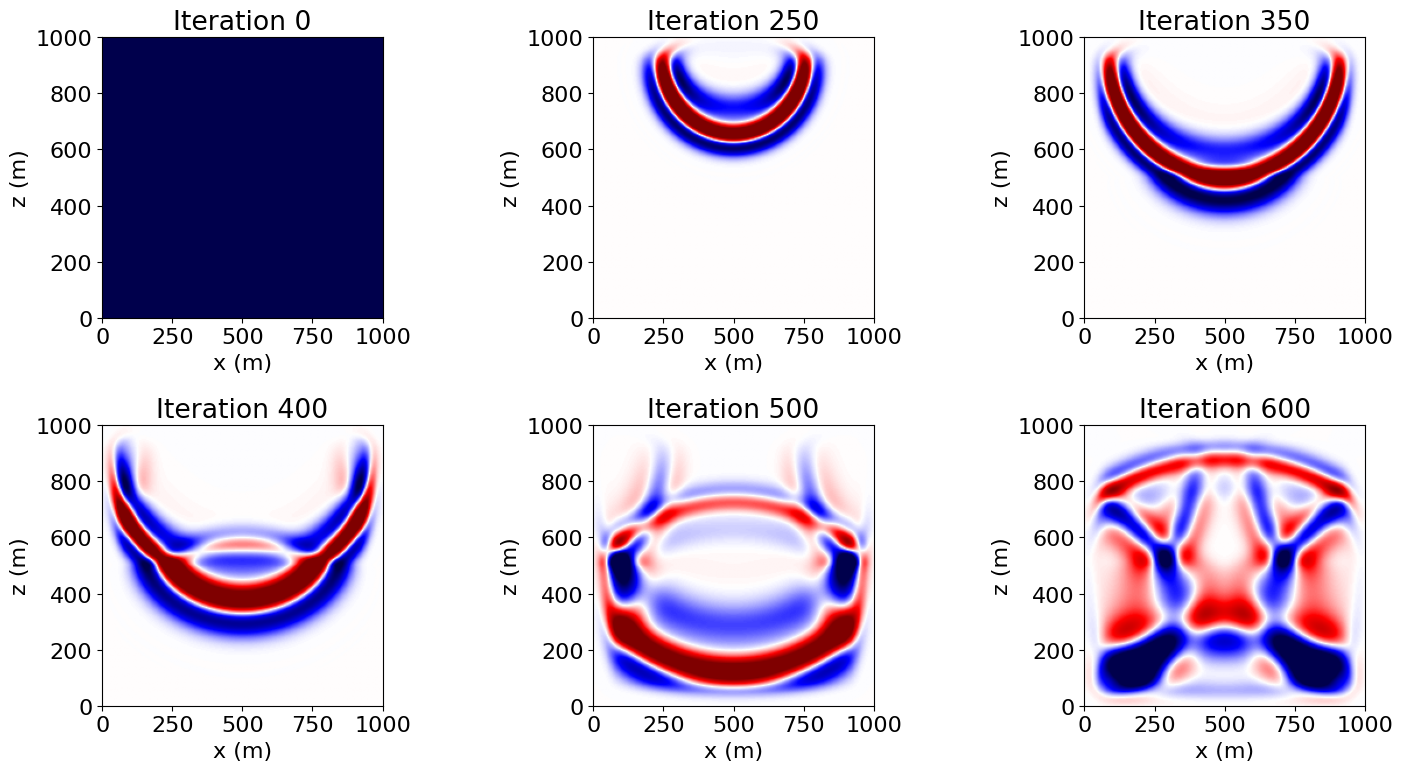

In [5]:
# Plot specific iterations of the wave field
plot_wave_iterations(u_, model, iterations=[0, 250, 350, 400, 500, 600])

## Visualize iterations at regular intervals

In [ ]:
plot_wave_iterations(u_, model, interval=20)

## Create an animation of the wave propagation

## Custom visualization

If you need more control over the visualization, you can create your own plots using the raw data from `u_`.

In [ ]:
# Create and save an animation
plot_wave_iterations(u_, model, interval=10, save_animation=True, filename='wave_propagation.gif')

## Frequency Domain Analysis

Transform the wave field to the frequency domain using Fourier transform and visualize it for several frequencies.

Frequency domain shape: (410, 241, 241)


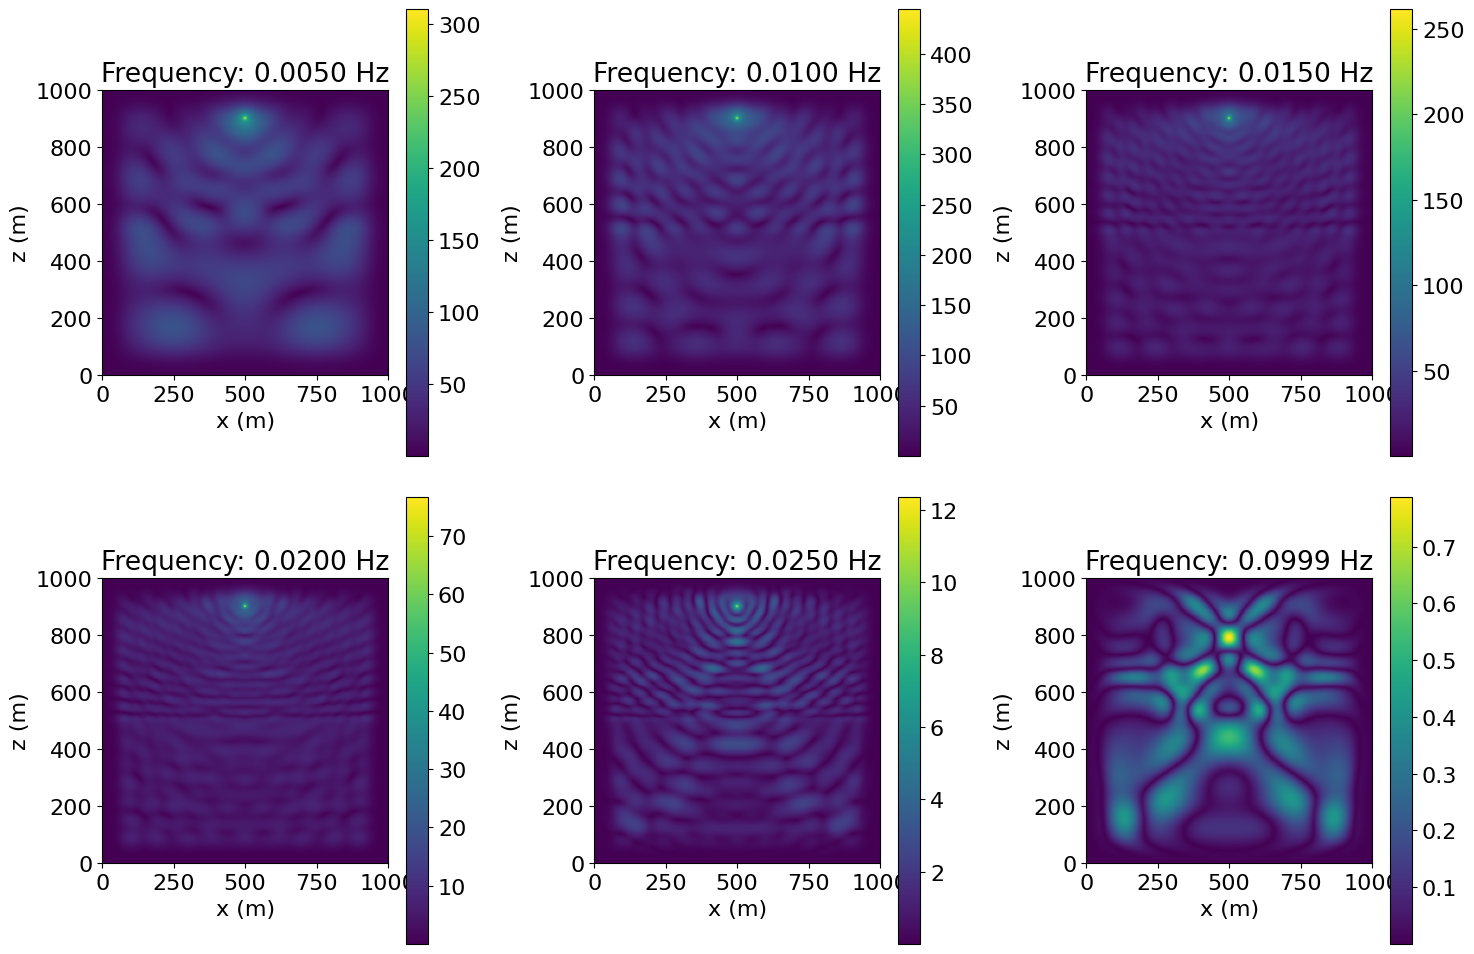

In [6]:
# Apply Fourier transform along the time dimension
u_freq = np.fft.rfft(u_.data, axis=0)
print(f"Frequency domain shape: {u_freq.shape}")

# Calculate frequency values
n_time_steps = u_.shape[0]
dt = (tn - t0) / (n_time_steps - 1)
freq = np.fft.rfftfreq(n_time_steps, d=dt)


# Select frequencies to visualize (around the source frequency f0=0.01 Hz)
target_freqs = [0.005, 0.01, 0.015, 0.02, 0.025, 0.1]
freq_indices = [np.abs(freq - f).argmin() for f in target_freqs]

# Plot magnitude of wave field at different frequencies
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, freq_idx in enumerate(freq_indices):
    magnitude = np.abs(u_freq[freq_idx])
    im = axes[i].imshow(magnitude.T, cmap='viridis',
                       extent=[model.origin[0], model.origin[0] + model.domain_size[0],
                              model.origin[1], model.origin[1] + model.domain_size[1]])
    axes[i].set_title(f'Frequency: {freq[freq_idx]:.4f} Hz')
    axes[i].set_xlabel('x (m)')
    axes[i].set_ylabel('z (m)')
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

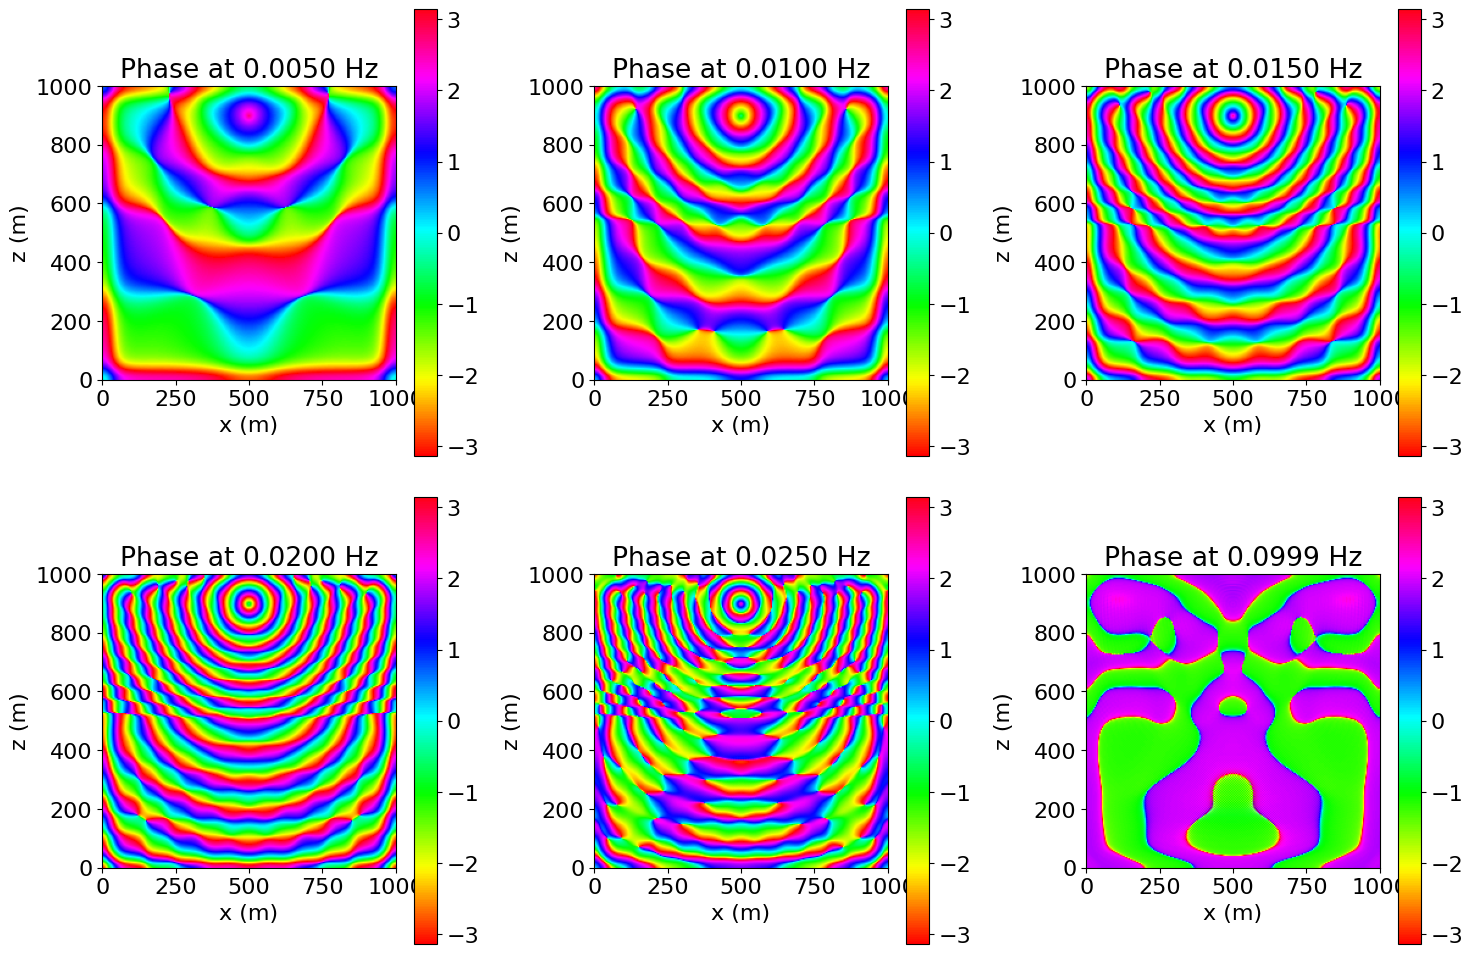

In [8]:
# Plot phase of wave field at different frequencies
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, freq_idx in enumerate(freq_indices):
    phase = np.angle(u_freq[freq_idx])
    im = axes[i].imshow(phase.T, cmap='hsv',
                       extent=[model.origin[0], model.origin[0] + model.domain_size[0],
                              model.origin[1], model.origin[1] + model.domain_size[1]],
                       vmin=-np.pi, vmax=np.pi)
    axes[i].set_title(f'Phase at {freq[freq_idx]:.4f} Hz')
    axes[i].set_xlabel('x (m)')
    axes[i].set_ylabel('z (m)')
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

Frequency domain shape: (410, 241, 241)


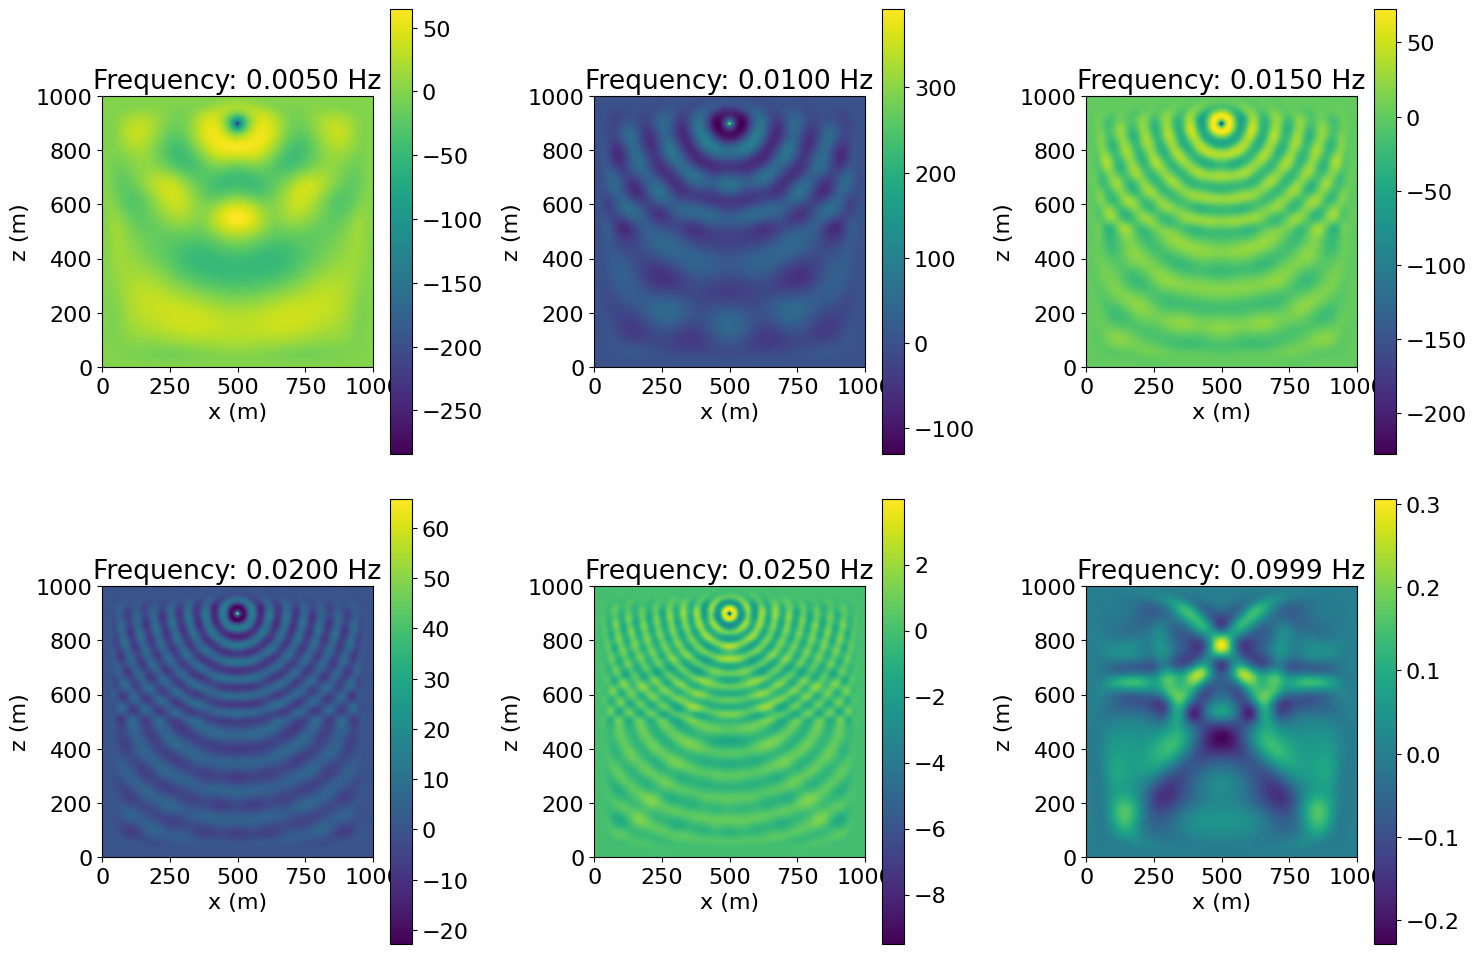

In [9]:
# Apply Fourier transform along the time dimension
u_freq = np.fft.rfft(u_.data, axis=0)
print(f"Frequency domain shape: {u_freq.shape}")

# Calculate frequency values
n_time_steps = u_.shape[0]
dt = (tn - t0) / (n_time_steps - 1)
freq = np.fft.rfftfreq(n_time_steps, d=dt)

# Select frequencies to visualize (around the source frequency f0=0.01 Hz)
target_freqs = [0.005, 0.01, 0.015, 0.02, 0.025, 0.1]
freq_indices = [np.abs(freq - f).argmin() for f in target_freqs]

# Plot real part of wave field at different frequencies
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, freq_idx in enumerate(freq_indices):
    real_part = np.real(u_freq[freq_idx])
    im = axes[i].imshow(real_part.T, cmap='viridis',
                       extent=[model.origin[0], model.origin[0] + model.domain_size[0],
                              model.origin[1], model.origin[1] + model.domain_size[1]])
    axes[i].set_title(f'Frequency: {freq[freq_idx]:.4f} Hz')
    axes[i].set_xlabel('x (m)')
    axes[i].set_ylabel('z (m)')
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()


Frequency domain shape: (410, 241, 241)


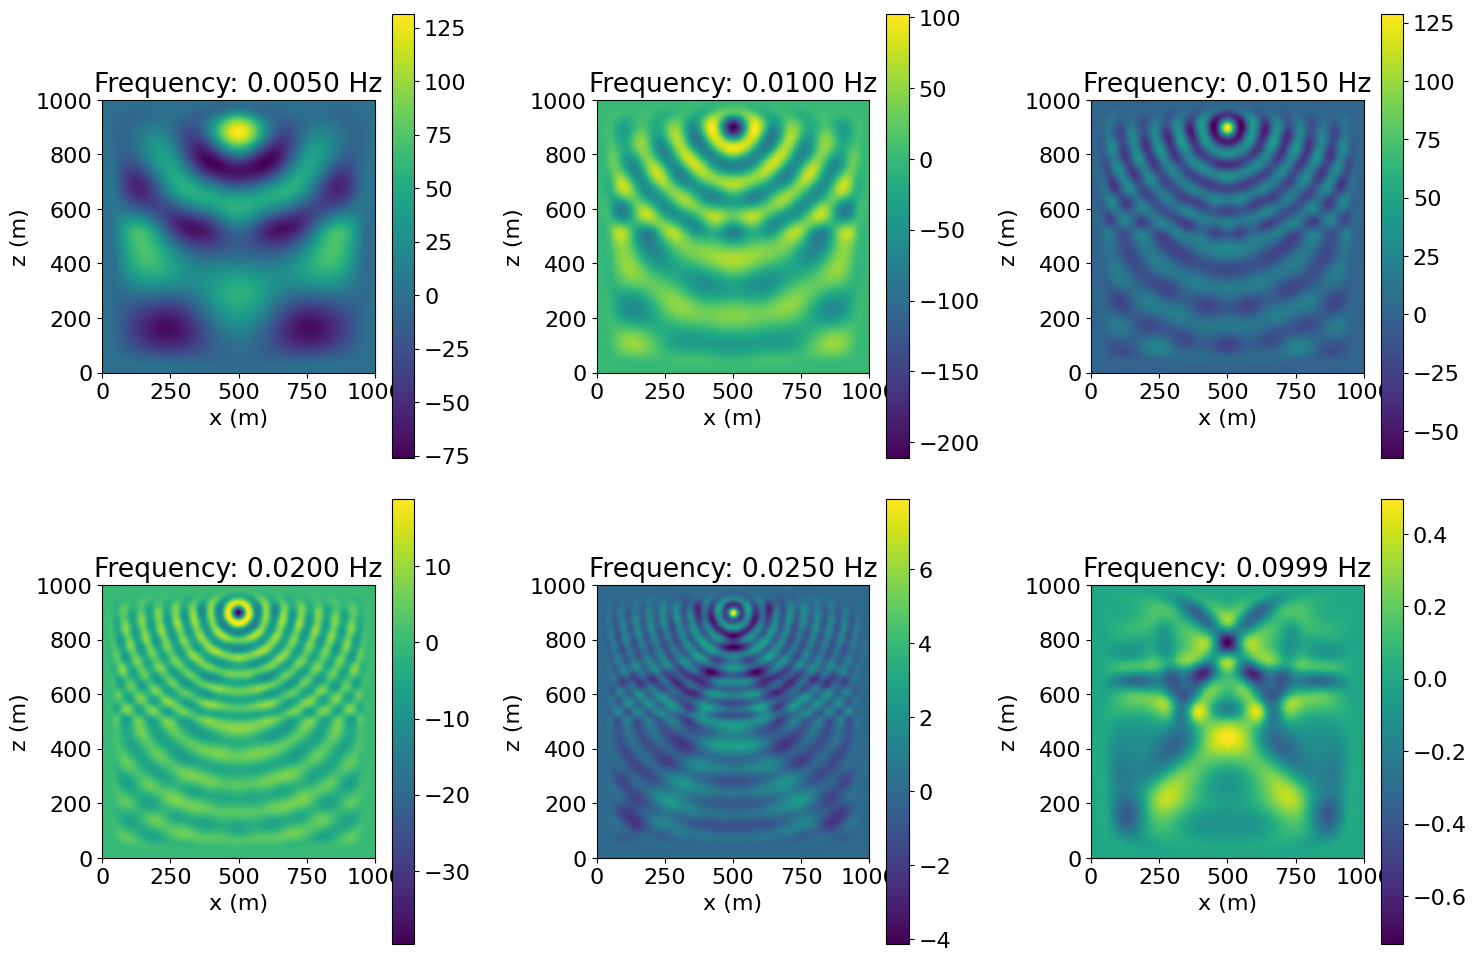

In [12]:
# Apply Fourier transform along the time dimension
u_freq = np.fft.rfft(u_.data, axis=0)
print(f"Frequency domain shape: {u_freq.shape}")

# Calculate frequency values
n_time_steps = u_.shape[0]
dt = (tn - t0) / (n_time_steps - 1)
freq = np.fft.rfftfreq(n_time_steps, d=dt)

# Select frequencies to visualize (around the source frequency f0=0.01 Hz)
target_freqs = [0.005, 0.01, 0.015, 0.02, 0.025, 0.1]
freq_indices = [np.abs(freq - f).argmin() for f in target_freqs]

# Plot real part of wave field at different frequencies
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, freq_idx in enumerate(freq_indices):
    imag_part = np.imag(u_freq[freq_idx])
    im = axes[i].imshow(imag_part.T, cmap='viridis',
                       extent=[model.origin[0], model.origin[0] + model.domain_size[0],
                              model.origin[1], model.origin[1] + model.domain_size[1]])
    axes[i].set_title(f'Frequency: {freq[freq_idx]:.4f} Hz')
    axes[i].set_xlabel('x (m)')
    axes[i].set_ylabel('z (m)')
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

In [104]:
#EXPORTING THE MAGNITUDES

import pandas as pd
import numpy as np

# Choose the frequency of interest
target_freq = 0.015  # for example
freq_idx = np.abs(freq - target_freq).argmin()

# Get magnitude of the complex FFT result at that frequency
magnitude = np.abs(u_freq[freq_idx])  # shape: (z, x)

# Get spatial coordinates
nx, nz = u_.shape[2], u_.shape[1]
x = np.linspace(model.origin[0], model.origin[0] + model.domain_size[0], nx)
z = np.linspace(model.origin[1], model.origin[1] + model.domain_size[1], nz)
X, Z = np.meshgrid(x, z[::-1], indexing='ij')  # invertir z para que coincida con la corrección

# Flatten for CSV
data = {
    "x": X.flatten(),
    "z": Z.flatten(),
    "u": magnitude[::-1, :].flatten()
}

# Export to CSV
df = pd.DataFrame(data)
df.to_csv(f"magnitude_{target_freq:.4f}Hz.csv", index=False)



In [105]:
#EXPORTING THE PHASE
import pandas as pd
import numpy as np

# Choose the frequency of interest
target_freq = 0.015  # for example
freq_idx = np.abs(freq - target_freq).argmin()

# Get phase of the complex FFT result at that frequency
phase = np.angle(u_freq[freq_idx])  # shape: (z, x)

# Get spatial coordinates
nx, nz = u_.shape[2], u_.shape[1]
x = np.linspace(model.origin[0], model.origin[0] + model.domain_size[0], nx)
z = np.linspace(model.origin[1], model.origin[1] + model.domain_size[1], nz)
X, Z = np.meshgrid(x, z[::-1], indexing='ij')  # invert z axis

# Flatten for CSV
data = {
    "x": X.flatten(),
    "z": Z.flatten(),
    "phase": phase[::-1, :].flatten()  # invert z to match coordinates
}

# Export to CSV
df = pd.DataFrame(data)
df.to_csv(f"phase_{target_freq:.4f}Hz.csv", index=False)



In [106]:
import pandas as pd
import numpy as np

# Parámetros del modelo
shape = (101, 101)
spacing = (10., 10.)
origin = (0., 0.)

# Definir el perfil de velocidades (en km/s)
v = np.empty(shape, dtype=np.float32)
v[:, :51] = 1.5
v[:, 51:] = 2.5

# Crear malla espacial
nx, nz = shape
x = np.linspace(origin[0], origin[0] + spacing[0]*(nx - 1), nx)
z = np.linspace(origin[1], origin[1] + spacing[1]*(nz - 1), nz)
X, Z = np.meshgrid(x, z[::-1], indexing='ij')  # invertimos z para que coincida con los otros CSVs

# Preparar datos para exportar
data = {
    "x": X.flatten(),
    "z": Z.flatten(),
    "c": v[:, ::-1].flatten()  # invertimos z (segunda dimensión)
}

# Guardar a CSV
df = pd.DataFrame(data)
df.to_csv("velocity_model.csv", index=False)


In [7]:
######Exports the real part of the Helmholtz EQ

import pandas as pd
import numpy as np

# Choose the frequency of interest
target_freq = 0.012  # for example
freq_idx = np.abs(freq - target_freq).argmin()

# Get magnitude of the complex FFT result at that frequency
real_part=np.real(u_freq[freq_idx])
# Get spatial coordinates
nx, nz = u_.shape[2], u_.shape[1]
x = np.linspace(model.origin[0], model.origin[0] + model.domain_size[0], nx)
z = np.linspace(model.origin[1], model.origin[1] + model.domain_size[1], nz)
X, Z = np.meshgrid(x, z[::-1], indexing='ij')  # invertir z para que coincida con la corrección

# Flatten for CSV
data = {
    "x": X.flatten(),
    "z": Z.flatten(),
    "u": real_part[::-1, :].flatten()
}

# Export to CSV
df = pd.DataFrame(data)
df.to_csv(f"real_part_{target_freq:.4f}Hz.csv", index=False)

In [8]:
######Exports the imag part of the Helmholtz EQ

import pandas as pd
import numpy as np

# Choose the frequency of interest
target_freq = 0.012  # for example
freq_idx = np.abs(freq - target_freq).argmin()

# Get magnitude of the complex FFT result at that frequency
imag_part=np.imag(u_freq[freq_idx])
# Get spatial coordinates
nx, nz = u_.shape[2], u_.shape[1]
x = np.linspace(model.origin[0], model.origin[0] + model.domain_size[0], nx)
z = np.linspace(model.origin[1], model.origin[1] + model.domain_size[1], nz)
X, Z = np.meshgrid(x, z[::-1], indexing='ij')  # invertir z para que coincida con la corrección

# Flatten for CSV
data = {
    "x": X.flatten(),
    "z": Z.flatten(),
    "u": imag_part[::-1, :].flatten()
}

# Export to CSV
df = pd.DataFrame(data)
df.to_csv(f"imag_part_{target_freq:.4f}Hz.csv", index=False)

In [15]:
# Find the row with the maximum 'u' value
max_row = df.loc[df['u'].idxmax()]

# Print the full row
print(max_row)


x    570.833313
z    895.833313
u     90.801544
Name: 33042, dtype: float32


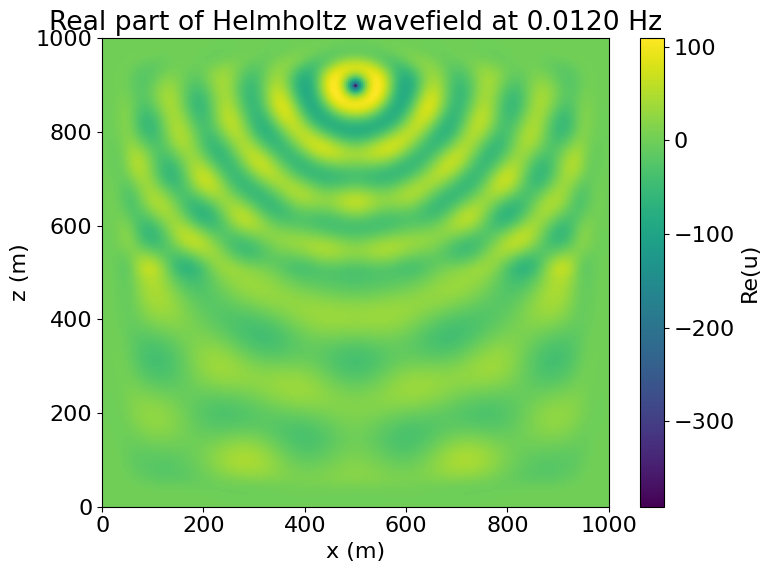

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame si no está ya en memoria
# df = pd.read_csv(f"real_part_{target_freq:.4f}Hz.csv")  # Descomenta si vas a leer desde el CSV

# Crear el gráfico
plt.figure(figsize=(8, 6))
pivot = df.pivot_table(index='z', columns='x', values='u')
plt.imshow(pivot.values, extent=[df.x.min(), df.x.max(), df.z.min(), df.z.max()],
           cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Re(u)')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title(f'Real part of Helmholtz wavefield at {target_freq:.4f} Hz')
plt.tight_layout()
plt.show()
